# **<center><font style="color:rgb(60,145,242)">Movie Recommendation System</font> </center>**
#### <center><font style="color:rgb(255,255,255)">Rokshana Ahmed (1994927), Firdaous Hajjaji (2006406), Elena Martellucci (1988602) </font> </center>

<center>

## *<font style="color:rgb(255,255,255)"> Outline </font>*

- *`Step 1:` [Overview](#overview)*
    - *[TF-IDF](#TF-IDF)*
    - *[Count Vectorizer](#CountVectorizer)*
    - *[Hash Vectorizer](#HashVectorizer)*
    - *[Word2Vec](#Word2Vec)*
    - *[Doc2Vec](#Doc2Vec)*
    - *[GloVe](#GloVe)*
    - *[Dataset](#Dataset)*

- *`Step 2:` [Installation and Importation of Libraries](#import)*

- *`Step 3:` [Data Preprocessing](#preprocess)*
 
    - *`Step 3.1:` [Data Collection](#split)*
    
    - *`Step 3.2:` [Feature Extraction](#aug)*
        
- *`Step 4:` [Techniques of Text-to-Vector Convertion](#models)*

    - *`Step 4.1:` [TF-IDF](#TF-IDF1)*
    
    - *`Step 4.2:` [Count Vectorizer](#CountVectorizer1)*
    
    - *`Step 4.3:` [Hash Vectorizer](#HashVectorizer1)*
    
    - *`Step 4.4:` [Word2Vec](#Word2Vec1)*

    - *`Step 4.5:` [Doc2Vec](#Doc2Vec1)*

    - *`Step 4.6:` [GloVe](#GloVe1)*

- *`Step 5:` [Cosine Similarity](#cosinesim)*

- *`Step 6:` [Top 30 Recommendations](#recommend)*
    - *`Step 6.1:` [Save into a csv file](#csvmodel)*
    - *`Step 6.2:` [Graphical Interpretation of the recommendations](#graphs)*


# <a name="overview"></a> **<font style="color:rgb(0,191,255)">Overview:</font>**

A **movie recommendation system** is an ML-based approach to filtering or predicting the users film preferences based on their past choices and behavior. 
The primary goal of movie recommendation systems is to filter and predict only those movies that a corresponding user is most likely to want to watch, based on their preference.
Our aim is to design and implement such a system using various text to vector conversion techniques and cosine similarity.

### <a name="TF-IDF"></a> **<font style="color:rgb(0,191,255)">1. TF - IDF </font>**  

**`TF-IDF`**  is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. It consists of two parts:

1. **Term Frequency (TF)**: This measures how frequently a term occurs in a document. It is calculated by dividing the number of times a term appears in a document by the total number of terms in the document. It helps in identifying the importance of a term within a specific document.
$$
\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$


2. **Inverse Document Frequency (IDF)**: This measures how important a term is across the entire corpus of documents. It is calculated by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that ratio. Terms that occur frequently across many documents will have a lower IDF, while terms that occur rarely will have a higher IDF, indicating their importance.

$$ \text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents in corpus } N}{\text{Number of documents containing term } t}\right) $$

Once both TF and IDF are calculated, TF-IDF is computed by multiplying TF and IDF:

$$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) $$

In scikit-learn's `TfidfVectorizer`, the TF-IDF calculation involves additional normalization steps to avoid bias towards longer documents. These normalization steps can include L2 normalization (scaling by the Euclidean norm of each row) or L1 normalization (scaling by the sum of absolute values of each row). This normalization ensures that the TF-IDF vectors have unit norm, which can be beneficial for various machine learning algorithms.

Overall, TF-IDF assigns higher weights to terms that are frequent within a specific document but relatively rare across all documents, aiming to capture the distinctive characteristics of each document in the corpus.



### <a name="CountVectorizer"></a> **<font style="color:rgb(0,191,255)">2. Count Vectorizer </font>**  
**`Count Vectorizers`** is yet again another numerical representations of words. It transforms a string into a frequency representation. The text is tokenized and very rudimentary processing is performed. The objective is to make a vector with as many dimensions as there are distinct words. Each unique word has its own dimension, which will be represented by 1 in that dimension and 0 in all others. It differs from TF-IDF as it only examines the appearance of a word in a single document instead of the whole document.

### <a name="HashVectorizer"></a> **<font style="color:rgb(0,191,255)">3. Hash Vectorizer </font>**  
**`Hash Vectorizers`** does the same thing as the count vectorizer but the key difference is that it doesn't store the resulting vocabulary (i.e. the unique tokens). With Hash Vectorizer, each token directly maps to a column position in a matrix, where its size is pre-defined. For example, if you have 10,000 columns in your matrix, each token maps to 1 of the 10,000 columns. This mapping happens via hashing. The hash function used is called Murmurhash3.

Not having to save the vocabulary is very efficient for a large dataset because the resulting HashingVectorizer object when saved, would be much smaller and thus faster to load back into memory when needed.
    
The downside of doing this is that it will not be possible to retrieve the actual token given the column position.

### <a name="Word2Vec"></a> **<font style="color:rgb(0,191,255)">4. Word2Vec </font>**  
**`Word2vec`** Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. 

While **`Word2vec`** is not a deep neural network, it turns text into a numerical form that deep neural networks can understand. The purpose and usefulness of **`Word2vec`** is to group the vectors of similar words together in vectorspace.

### <a name="Doc2Vec"></a> **<font style="color:rgb(0,191,255)">5. Doc2Vec </font>**  
**`Doc2vec`** is a popular technique in Natural Language Processing that enables the representation of documents as vectors. This technique was introduced as an extension to Word2Vec. It is an unsupervised learning technique that maps each document to a fixed-length vector in a high-dimensional space.

### <a name="GloVe"></a> **<font style="color:rgb(0,191,255)">6. GloVe </font>**  
**`GloVe`** is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space. 

**`GloVe`** is essentially a log-bilinear model with a weighted least-squares objective. The main intuition underlying the model is the simple observation that ratios of word-word co-occurrence probabilities have the potential for encoding some form of meaning. 

The training objective of **`GloVe`** is to learn word vectors such that their dot product equals the logarithm of the words' probability of co-occurrence. Owing to the fact that the logarithm of a ratio equals the difference of logarithms, this objective associates (the logarithm of) ratios of co-occurrence probabilities with vector differences in the word vector space. Because these ratios can encode some form of meaning, this information gets encoded as vector differences as well. For this reason, the resulting word vectors perform very well on word analogy tasks.

### <a name="Dataset"></a> **<font style="color:rgb(0,191,255)">7. Dataset </font>**  
The dataset, obtained from Kaggle, is labeled as the "TMBD 5000 Movie Dataset", which actually includes 4803 items. Spanning 24 features, this dataset offers a comprehensive range of details, including movie ID, title, cast members, producers, release year, and assorted attributes.

# <a name="import"></a> **<font style="color:rgb(0,191,255)"> Installation & Importation Libraries</font>**

### **<font style="color:rgb(0,191,255)"> Install and Import the required libraries. </font>**

In [2]:
pip install fuzzywuzzy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import pandas as pd
import difflib
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/elena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# <a name="preprocess"></a> **<font style="color:rgb(0,191,255)"> Data Preprocessing</font>**

## <a name="split"></a> **<font style="color:rgb(0,191,255)"> Data Collection</font>**

In [4]:
# Loading movie data from a CSV file into a Pandas DataFrame.
# NOTE: Please verify the filepath to ensure it matches the location of the CSV file on your system.
movies_data = pd.read_csv('/Users/elena/Downloads/movies_small2.csv')

In [5]:
# Displaying the first 5 rows of the DataFrame to inspect the data structure.
movies_data.head()

,index,genres,keywords,tagline,title,cast,director
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Spectre,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,The Dark Knight Rises,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",John Carter,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


## <a name="aug"></a> **<font style="color:rgb(0,191,255)"> Feature Extraction</font>**

During the preprocessing phase, we extracted only the most relevant columns/features for our analysis. Out of the numer- ous attributes available, we specifically selected five key fea- tures: ’genres’, ’keywords’, ’tagline’, ’cast’, and ’director’. Once identified, we took measures to handle missing values by replacing them with null strings, ensuring data complete- ness and consistency and we combined them into a single co- hesive text representation, which served as the basis for em- bedding techniques and it enabled us to capture rich semantic information.

In [7]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']


In [8]:
# replacing the null valuess with null string for missing data
# (not for all columns, just the ones we are interested in )

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [9]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [10]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


# <a name="models"></a> **<font style="color:rgb(0,191,255)"> Techniques of Text-to-Vector Conversion</font>**

## <a name="TF-IDF1"></a> **<font style="color:rgb(0,191,255)"> TF-IDF</font>**

In [11]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [12]:
feature_vectors_tfidfvec = vectorizer.fit_transform(combined_features)

In [13]:
print(feature_vectors_tfidfvec)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

## <a name="CountVectorizer1"></a> **<font style="color:rgb(0,191,255)"> Count Vectorizer</font>**

In [14]:
# converting the text data to feature vectors

vectorizer = CountVectorizer()

In [15]:
feature_vectors_countvec = vectorizer.fit_transform(combined_features)

In [16]:
print(feature_vectors_countvec)

  (0, 201)	1
  (0, 274)	1
  (0, 5274)	1
  (0, 13599)	1
  (0, 5437)	1
  (0, 3678)	1
  (0, 3065)	1
  (0, 5836)	1
  (0, 14378)	2
  (0, 16587)	1
  (0, 3225)	1
  (0, 14271)	1
  (0, 4945)	1
  (0, 15261)	1
  (0, 16998)	1
  (0, 11192)	1
  (0, 11503)	1
  (0, 13349)	1
  (0, 17007)	1
  (0, 17290)	1
  (0, 13319)	1
  (0, 14064)	1
  (0, 16668)	1
  (0, 14608)	1
  (0, 8756)	1
  :	:
  (4801, 403)	1
  (4801, 4835)	1
  (4801, 17266)	1
  (4801, 13835)	1
  (4801, 13175)	1
  (4801, 17150)	1
  (4801, 3511)	1
  (4801, 13948)	1
  (4801, 7269)	1
  (4802, 11161)	1
  (4802, 4518)	1
  (4802, 2129)	2
  (4802, 4980)	1
  (4802, 6155)	1
  (4802, 3436)	1
  (4802, 4528)	1
  (4802, 1316)	1
  (4802, 12989)	1
  (4802, 4371)	1
  (4802, 6417)	1
  (4802, 4608)	1
  (4802, 2425)	1
  (4802, 3654)	1
  (4802, 5367)	1
  (4802, 6996)	2


## <a name="HashVectorizer1"></a> **<font style="color:rgb(0,191,255)"> Hash Vectorizer </font>**

In [17]:
vectorizer = HashingVectorizer()

In [18]:
feature_vectors_hashvec = vectorizer.fit_transform(combined_features)

In [19]:
print(feature_vectors_hashvec)

  (0, 160821)	-0.17677669529663687
  (0, 182920)	-0.17677669529663687
  (0, 185685)	0.17677669529663687
  (0, 190764)	0.17677669529663687
  (0, 202140)	0.17677669529663687
  (0, 213357)	0.17677669529663687
  (0, 257255)	0.17677669529663687
  (0, 286878)	-0.17677669529663687
  (0, 307590)	0.17677669529663687
  (0, 335487)	-0.17677669529663687
  (0, 440852)	0.17677669529663687
  (0, 479532)	0.17677669529663687
  (0, 549296)	-0.35355339059327373
  (0, 566964)	0.17677669529663687
  (0, 625101)	-0.17677669529663687
  (0, 630445)	-0.17677669529663687
  (0, 635756)	0.17677669529663687
  (0, 639749)	-0.17677669529663687
  (0, 642085)	0.17677669529663687
  (0, 670012)	0.17677669529663687
  (0, 733283)	0.17677669529663687
  (0, 776967)	0.17677669529663687
  (0, 897264)	-0.17677669529663687
  (0, 946261)	0.17677669529663687
  (0, 968222)	-0.17677669529663687
  :	:
  (4801, 676905)	-0.23570226039551587
  (4801, 681351)	0.23570226039551587
  (4801, 775106)	0.23570226039551587
  (4801, 811006)	-0.23

## <a name="Word2Vec1"></a> **<font style="color:rgb(0,191,255)"> Word2Vec</font>**

In [20]:
# Tokenize your text data
tokenized_data = [text.split() for text in combined_features]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=200, window=5, min_count=1, workers=4,epochs=5)

In [23]:
def document_vectorizer(doc):
    vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else np.zeros(word2vec_model.vector_size)

In [25]:
movie_vectors_word2vec = [document_vectorizer(tokens) for tokens in tokenized_data]

## <a name="Doc2Vec1"></a> **<font style="color:rgb(0,191,255)"> Doc2Vec</font>**

In [27]:
# Tokenize your text data using nltk.word_tokenize
tokenized_data = [word_tokenize(text.lower()) for text in combined_features]

# Tag each document with its index
tagged_data = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_data)]

In [28]:
# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=200, window=5, min_count=1, workers=4, epochs=5)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [29]:
# Get vectors for each document
movie_vectors_doc2vec = [doc2vec_model.dv[i] for i in range(len(tagged_data))]

## <a name="GloVe1"></a> **<font style="color:rgb(0,191,255)"> GloVe </font>**

This code is essentially performing the following steps:

1. Loading pre-trained GloVe word embeddings from a text file.
2. Defining a function to embed text using the loaded GloVe embeddings.
3. Embedding each text feature using GloVe embeddings and storing the resulting embeddings in a list.
4. Converting the list of embeddings into a NumPy array and reshaping it into a 2D array.

The resulting movie_embeddings_GloVE array contains the embedded representations of the input text features using GloVe embeddings. These embeddings can then be used as input features for various machine learning or natural language processing tasks.

In [30]:
##Initialize the function to load GloVe embeddings
def load_glove_embeddings(file_path):
  """
    Load GloVe word embeddings from a text file.
    
    Parameters:
    - file_path: Path to the GloVe embeddings file.
    
    Returns:
    - embeddings_index: A dictionary mapping words to their corresponding embeddings.
  """
  embeddings_index = {}
  with open(file_path, encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs
  return embeddings_index

#Load GloVe embeddings (replace 'path/to/glove.6B.300d.txt' with the path to your downloaded GloVe file)
# NOTE: check the filepath for you personal computer 

glove_file_path = '/Users/elena/Downloads/glove.6B.300d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

In [31]:
# Function to embed text using GloVe embeddings
def embed_text(text, embeddings_index, max_vector_length):
    """
    Embed text using pre-trained GloVe embeddings.
    
    Parameters:
    - text: Input text to be embedded.
    - embeddings_index: Dictionary mapping words to their embeddings.
    - max_vector_length: Maximum length of the resulting embedding vectors.
    
    Returns:
    - padded_embedding: Embedded representation of the input text.
    """
    words = text.split()
    vectors = [embeddings_index.get(word, np.zeros_like(embeddings_index['a'])) for word in words]
    vectors = [vec for vec in vectors if not np.all(vec == 0)]  # Remove zero vectors
    if vectors:
        average_vector = np.nanmean(vectors, axis=0)
        # Pad or truncate the embedding to match the maximum length
        padded_embedding = np.pad(average_vector, (0, max(0, max_vector_length - len(average_vector))), 'constant')
        return padded_embedding
    else:
        return np.zeros(max_vector_length, dtype=np.float32)

# Create movie_embeddings
movie_embeddings = []
for text in combined_features:
    embedding = embed_text(text, glove_embeddings, 1)  # Assuming you use 1 as a placeholder for max_vector_length
    movie_embeddings.append(embedding)

# Find the maximum number of non-zero elements in the embeddings
max_vector_length = max(
    np.count_nonzero(embedding) for embedding in movie_embeddings
)

# Pad or truncate the embeddings to have the same length
movie_embeddings = [np.pad(embedding, (0, max(0, max_vector_length - len(embedding))), 'constant') for embedding in movie_embeddings]

# Convert movie_embeddings to a NumPy array
movie_embeddings = np.array(movie_embeddings, dtype=object)  # Use object type to handle variable-length arrays

# Embed text for each movie
movie_embeddings = []
for text in combined_features:
    embedding = embed_text(text, glove_embeddings, max_vector_length)
    movie_embeddings.append(embedding)

# Convert movie_embeddings to a NumPy array
movie_embeddings = np.array(movie_embeddings, dtype=np.float32)

# Reshape movie_embeddings to be a 2D array
movie_embeddings_GloVE = np.vstack(movie_embeddings)

# <a name="cosinesim"></a> **<font style="color:rgb(0,191,255)"> Cosine Similarity </font>**

 **<font style="color:rgb(0,191,255)"> QUICK GUIDE FOR RUNNING COSINE SIMILARITY </font>**  

- Step 1: Choose which vectorizer to use for the recommendation system
- Step 2: Run the corresponding code for that vectorizer
- Step 3: Run the code for cosine similarity by making sure to use the similarity of the corresponding vectorizer and keep the others commented

NOTE: To run GloVE, you need to download the glove.6B.300d.txt file and load in the code, then run glove_embeddings.

In [35]:
# getting the similarity scores using cosine similarity
# for each movie it compares it to another and calculates in cosine similarity as seen in class

#similarity = cosine_similarity(movie_vectors_word2vec)
#similarity = cosine_similarity(movie_vectors_doc2vec)
similarity = cosine_similarity(feature_vectors_tfidfvec)
#similarity = cosine_similarity(movie_embeddings_GloVE)
#similarity = cosine_similarity(feature_vectors_countvec)
#similarity = cosine_similarity(feature_vectors_hashvec)

In [36]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


# <a name="recommend"></a> **<font style="color:rgb(0,191,255)"> Top 30 Recommendations </font>**

### <a name="recommend"></a> **<font style="color:rgb(0,191,255)"> Getting the Movie Name from the User  </font>**

In [37]:
# getting the movie name from the user
movie_name = input(' Enter your favourite movie name : ')
# creating a list with all the movie names given in the dataset
list_of_all_titles = movies_data['title'].tolist()
# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles,3,0.7)
#selects the first one in the list of close matches
if len(find_close_match) > 0:
  close_match = find_close_match[0]
  print(close_match)
else:
  print("Movie not in dataset")
# finding the index of the movie with title
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

Iron Man


### <a name="recommend"></a> **<font style="color:rgb(0,191,255)"> Getting Movie Reccomandation  </font>**

In [39]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))

In [40]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

In [42]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1
movie_elements = list()
sim_elements = list()

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]

  if (i<=31):
    if i == 1:
      pass
    else:
      sim = round(float(movie[1] * 100))
      print(i-1, '.',title_from_index , "(similarity =", sim ,"%)")
      movie_elements.append(title_from_index)
      sim_elements.append(sim)
    i+=1

Movies suggested for you : 

1 . Iron Man 2 (similarity = 41 %)
2 . Iron Man 3 (similarity = 31 %)
3 . Avengers: Age of Ultron (similarity = 24 %)
4 . The Avengers (similarity = 23 %)
5 . Captain America: Civil War (similarity = 22 %)
6 . Captain America: The Winter Soldier (similarity = 21 %)
7 . Ant-Man (similarity = 20 %)
8 . X-Men (similarity = 17 %)
9 . Made (similarity = 16 %)
10 . X-Men: Apocalypse (similarity = 15 %)
11 . X2 (similarity = 15 %)
12 . The Incredible Hulk (similarity = 15 %)
13 . The Helix... Loaded (similarity = 15 %)
14 . X-Men: First Class (similarity = 14 %)
15 . X-Men: Days of Future Past (similarity = 14 %)
16 . Captain America: The First Avenger (similarity = 14 %)
17 . Kick-Ass 2 (similarity = 14 %)
18 . Guardians of the Galaxy (similarity = 14 %)
19 . Deadpool (similarity = 13 %)
20 . Thor: The Dark World (similarity = 13 %)
21 . G-Force (similarity = 13 %)
22 . X-Men: The Last Stand (similarity = 13 %)
23 . Duets (similarity = 12 %)
24 . Mortdecai (simil

## <a name="csvmodel"></a> **<font style="color:rgb(0,191,255)"> Save into a csv file </font>**

In [ ]:
import csv

movies = movie_elements  # Your list of movie names
similarity = sim_elements  # Your list of similarity scores

# Make sure both lists have the same length
if len(movies) != len(similarity):
    raise ValueError("Lengths of movies and similarity lists don't match")

# Zip the two lists together to iterate over them simultaneously
data = zip(movies, similarity)

with open('movie_similarity_Count_30.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the header if needed
    csv_writer.writerow(['Movie', 'Similarity'])
    # Write the data
    csv_writer.writerows(data)

## <a name="graphs"></a> **<font style="color:rgb(0,191,255)"> Graphical Interpretation of the recommendationse </font>**

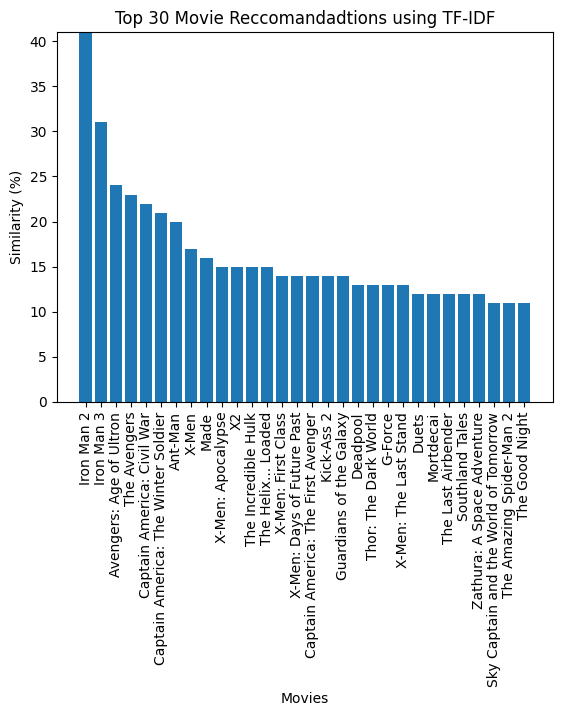

In [45]:
plt.bar(movie_elements, sim_elements)
plt.xlabel('Movies')
plt.ylim(0, max(sim_elements))
#plt.gca().set_xticklabels([])
plt.xticks(rotation=90)
plt.ylabel('Similarity (%)')
plt.title('Top 30 Movie Reccomandadtions using TF-IDF')
plt.savefig('Top30MovieReccomandadtions_TF-IDF.png',bbox_inches='tight')

plt.show()